<a href="https://colab.research.google.com/github/shikhar2402/Kaggle_NovoEnzyme/blob/main/EDA_On_Novoenzyme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 878 kB 8.4 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #graphing
import plotly.express as px #graphing
import seaborn as sns #graphing
from matplotlib import image as mpimg
import missingno as msno #describe data
plt.style.use('dark_background')

In [ ]:
# Refer this thread to understand and the reason for the below code https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/356251 

df_train = pd.read_csv("/content/drive/MyDrive/novozymes-enzyme-stability-prediction(1)/train.csv", index_col="seq_id")
df_train_updates = pd.read_csv("/content/drive/MyDrive/novozymes-enzyme-stability-prediction(1)/train_updates_20220929.csv", index_col="seq_id")
test = pd.read_csv('/content/drive/MyDrive/novozymes-enzyme-stability-prediction(1)/test.csv')

all_features_nan = df_train_updates.isnull().all("columns")

drop_indices = df_train_updates[all_features_nan].index
df_train = df_train.drop(index=drop_indices)

swap_ph_tm_indices = df_train_updates[~all_features_nan].index
df_train.loc[swap_ph_tm_indices, ["pH", "tm"]] = df_train_updates.loc[swap_ph_tm_indices, ["pH", "tm"]]

In [ ]:
train = df_train.reset_index(drop=True)

In [ ]:
train

,protein_sequence,pH,data_source,tm
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5
...,...,...,...,...
28976,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
28977,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
28978,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
28979,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


In [ ]:
test

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
...,...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [ ]:
from biopandas.pdb import PandasPdb

pdb_df =  PandasPdb().read_pdb("/content/drive/MyDrive/novozymes-enzyme-stability-prediction(1)/wildtype_structure_prediction_af2.pdb")
print(pdb_df.df.keys())
atom_df = pdb_df.df['ATOM']

dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])


In [ ]:
print(atom_df.head(), "\n")
print(atom_df.info(), "\n")

  record_name  atom_number blank_1 atom_name alt_loc residue_name blank_2  \
0        ATOM            1                 N                  VAL           
1        ATOM            2                 H                  VAL           
2        ATOM            3                H2                  VAL           
3        ATOM            4                H3                  VAL           
4        ATOM            5                CA                  VAL           

  chain_id  residue_number insertion  ... x_coord  y_coord  z_coord  \
0        A               1            ...  34.064   -6.456   50.464   
1        A               1            ...  33.576   -6.009   51.228   
2        A               1            ...  33.882   -7.449   50.477   
3        A               1            ...  35.060   -6.323   50.566   
4        A               1            ...  33.643   -5.877   49.162   

   occupancy  b_factor  blank_4 segment_id element_symbol charge  line_idx  
0        1.0     45.11           

## x, y, z coords by element symbol

In [ ]:
fig = px.scatter_3d(atom_df, x = "x_coord", y = "y_coord", z = "z_coord",
                        color = "element_symbol", opacity = 0.8,
                   color_discrete_sequence = ["#84FFA9", "#FFFFFF", "#513DFF", "#FF3DFF", "#FFFA3D"])

fig.update_traces(marker = dict(size = 2, ))
fig.update_coloraxes(showscale = False)
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12, color = "#97FFFF"))
fig.show()

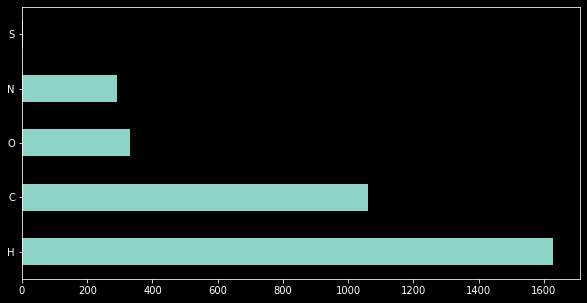

In [ ]:
atom_df.element_symbol.value_counts().plot(kind = "barh", figsize = (10, 5))

## x, y, z coords by b_factor

In [ ]:


fig = px.scatter_3d(atom_df, x = "x_coord", y = "y_coord", z = "z_coord",
                    color = "b_factor", opacity = 0.8,
                    color_continuous_scale = "Spectral")

fig.update_traces(marker = dict(size = 2, ))
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12, color = "#97FFFF"))
fig.show()



## x, y, z coords by residue_number

In [ ]:
fig = px.scatter_3d(atom_df, x = "x_coord", y = "y_coord", z = "z_coord",
                   color = "residue_number", opacity = 0.8,
                   color_continuous_scale = "Spectral")

fig.update_traces(marker = dict(size = 2))
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12, color = "#97FFFF"))
fig.show()

In [ ]:
fig = px.histogram(atom_df, x = "residue_number", 
                   title = "Histogram of residue_number 📊", 
                   color_discrete_sequence = ["#C70000"])

fig.update_layout(bargap = 0.2)
fig.update_traces(marker = dict(line = dict(width = 1.5, color = "#FFFFFF")))
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 18, color = "#97FFFF"))
fig.show()

In [ ]:
train.head()

,protein_sequence,pH,data_source,tm
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28981 entries, 0 to 28980
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   protein_sequence  28981 non-null  object 
 1   pH                28695 non-null  float64
 2   data_source       28001 non-null  object 
 3   tm                28981 non-null  float64
dtypes: float64(2), object(2)
memory usage: 905.8+ KB


In [ ]:
train.protein_sequence.nunique()

27375

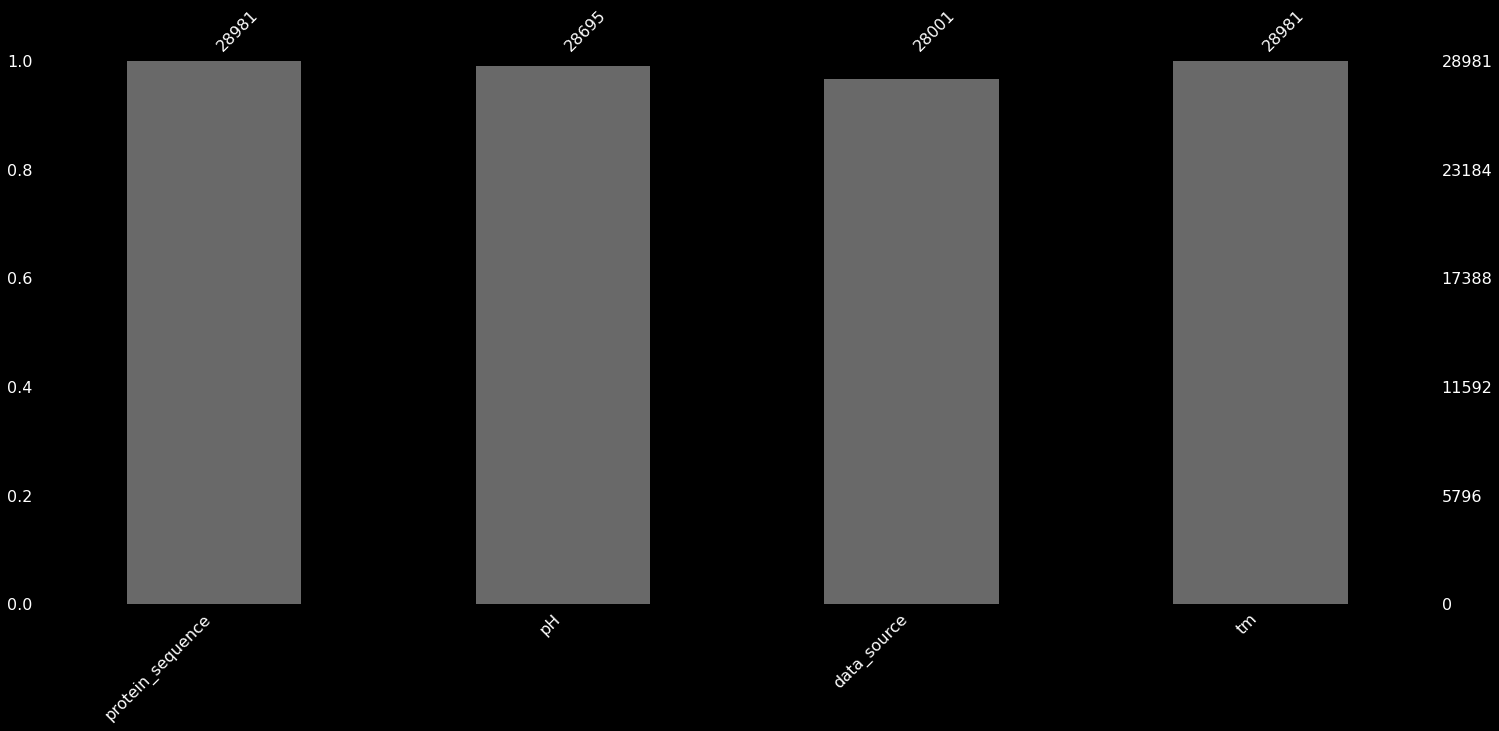

In [ ]:
msno.bar(train)

In [ ]:
fig = px.histogram(train, x = "tm", marginal = "box",
                   title = "Histogram of tm (melting point) 📊", 
                   color_discrete_sequence = ["#C70000"])

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 18, color = "#C70000"))
fig.show()

In [ ]:


pH = train[train["pH"] < 12]

fig = px.scatter(pH, x = "pH", y = "tm", color = "tm",
                   title = "pH by tm (melting point) scatter plot", 
                   color_continuous_scale = "RdBu_r")

fig.update_traces(marker = dict(size = 4))
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 18, color = "#C70000"))
fig.show()

